In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://quotes.toscrape.com"

In [3]:
base_url

'https://quotes.toscrape.com'

## Empty Lists to Store Data

In [4]:
quotes_data = []
authors_data = []
visited_authors = set()   # to avoid duplicate authors

## Start Crawling All Pages

In [13]:
next_page = "/"
page_number = 1

while next_page:
    print(f"Scraping page {page_number}: {next_page}")

    response = requests.get(base_url + next_page)
    soup = BeautifulSoup(response.text, "html.parser")

    quotes = soup.find_all("div", class_="quote")

    for quote in quotes:
        quote_text = quote.find("span", class_="text").get_text(strip=True)
        author_name = quote.find("small", class_="author").get_text(strip=True)

        tags = [tag.text for tag in quote.select(".tags a")]
        tags = ", ".join(tags)

        quotes_data.append([quote_text, author_name, tags])

        author_link = quote.select_one("a[href^='/author/']")["href"]

        if author_link not in visited_authors:
            visited_authors.add(author_link)

            author_response = requests.get(base_url + author_link)
            author_soup = BeautifulSoup(author_response.text, "html.parser")

            born_date = author_soup.find("span", class_="author-born-date").text
            born_place = author_soup.find("span", class_="author-born-location").text
            description = author_soup.find("div", class_="author-description").text.strip()

            authors_data.append([
                author_name, born_date, born_place, description
            ])

    next_button = soup.find("li", class_="next")

    if next_button:
        next_page = next_button.find("a")["href"]
        page_number += 1
    else:
        next_page = None


Scraping page 1: /
Scraping page 2: /page/2/
Scraping page 3: /page/3/
Scraping page 4: /page/4/
Scraping page 5: /page/5/
Scraping page 6: /page/6/
Scraping page 7: /page/7/
Scraping page 8: /page/8/
Scraping page 9: /page/9/
Scraping page 10: /page/10/


## Move to Next Page

In [14]:
    next_button = soup.find("li", class_="next")
    
    if next_button:
        next_page = next_button.find("a")["href"]
        page_number += 1
    else:
        next_page = None


## Create DataFrames

In [15]:
quotes_df = pd.DataFrame(
    quotes_data, columns=["Quote", "Author", "Tags"]
)

authors_df = pd.DataFrame(
    authors_data, columns=["Author", "Born Date", "Born Place", "Description"]
)


# Total count

In [16]:
print("Total quotes scraped:", len(quotes_df))
print("Total authors scraped:", len(authors_df))

Total quotes scraped: 110
Total authors scraped: 50


## Save CSV Files

In [17]:
quotes_df.to_csv("quotes_data.csv", index=False, encoding="utf-8-sig")
authors_df.to_csv("authors_data.csv", index=False, encoding="utf-8-sig")


## SIMPLE ANALYSIS 

In [18]:
## ✅ Top 5 Authors by Quotes

quotes_df["Author"].value_counts().head(5)


Author
J.K. Rowling       10
Albert Einstein    10
Marilyn Monroe      7
Dr. Seuss           7
Mark Twain          7
Name: count, dtype: int64

In [19]:
## Top 5 Most Used Tags

all_tags = quotes_df["Tags"].str.split(", ")
all_tags = all_tags.explode()

all_tags.value_counts().head(5)


Tags
love             15
life             15
inspirational    14
books            13
humor            12
Name: count, dtype: int64

## Visualization 

In [20]:
import matplotlib.pyplot as plt

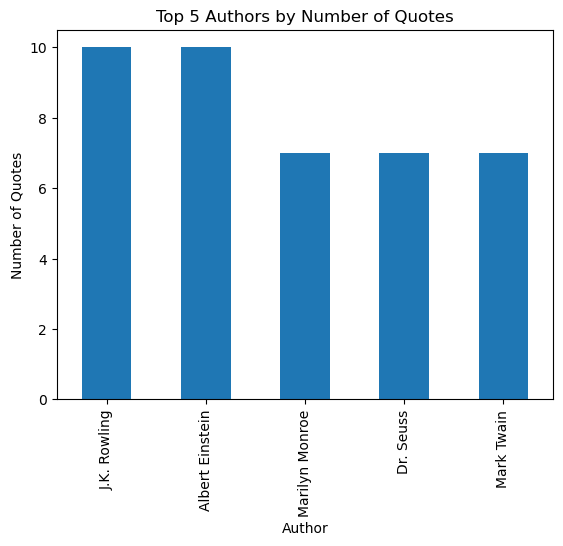

In [21]:
top_authors = quotes_df["Author"].value_counts().head(5)

top_authors.plot(kind="bar")
plt.title("Top 5 Authors by Number of Quotes")
plt.xlabel("Author")
plt.ylabel("Number of Quotes")
plt.show()


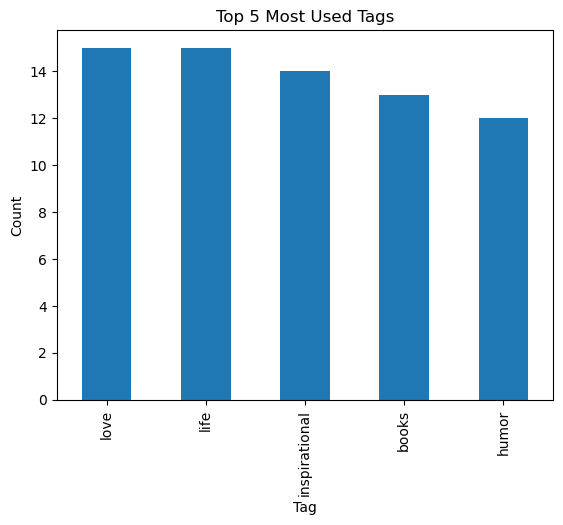

In [22]:
all_tags = quotes_df["Tags"].str.split(", ")
all_tags = all_tags.explode()

top_tags = all_tags.value_counts().head(5)

top_tags.plot(kind="bar")
plt.title("Top 5 Most Used Tags")
plt.xlabel("Tag")
plt.ylabel("Count")
plt.show()


## Export Data to Excel (.xlsx)

In [23]:
quotes_df.to_excel("quotes_data.xlsx", index=False)
authors_df.to_excel("authors_data.xlsx", index=False)